In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
os.chdir("C:\\Users\\Win10\\Desktop\\Projekat")

In [3]:
athletes = pd.read_csv('athlete_events.csv')

In [4]:
athletes.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN
271115,135571,Tomasz Ireneusz ya,M,34.0,185.0,96.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,NaN


In [5]:
athletes.shape

(271116, 15)

In [4]:
regions = pd.read_csv('noc_regions.csv')

In [7]:
regions.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [8]:
regions.shape

(230, 3)

In [5]:
#Join the dataframes

data = athletes.merge(regions, how = 'left', on = 'NOC')

In [10]:
data.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN,Poland,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN,Poland,NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN,Poland,NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN,Poland,NaN
271115,135571,Tomasz Ireneusz ya,M,34.0,185.0,96.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,NaN,Poland,NaN


In [11]:
data.shape

(271116, 17)

In [6]:
data.rename(columns = {'region':'Region', 'notes':'Notes'} ,inplace = True);

In [13]:
data.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN,Poland,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN,Poland,NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN,Poland,NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN,Poland,NaN
271115,135571,Tomasz Ireneusz ya,M,34.0,185.0,96.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,NaN,Poland,NaN


#  Check Missing values

In [7]:
nan_values = data.isna()
nan_columns = nan_values.any()
nan_columns

ID        False
Name      False
Sex       False
Age        True
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal      True
Region     True
Notes      True
dtype: bool

In [8]:
data.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
Region       370
Notes     266077
dtype: int64

Text(0.5, 1.0, 'Missing value Count by Column')

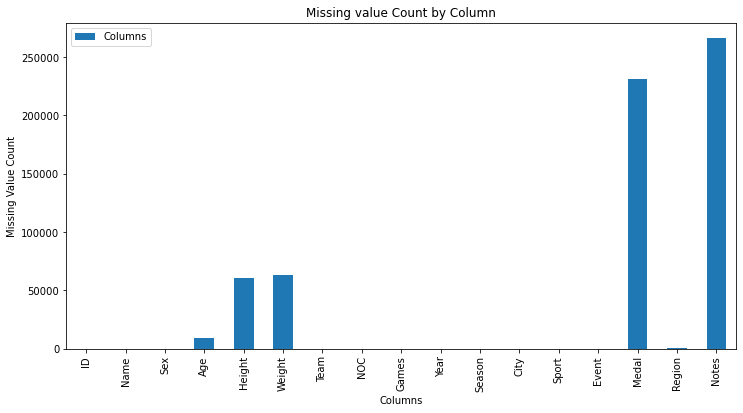

In [9]:
x = data.isna().sum().to_frame()
x.columns = ["Columns"]
x.plot.bar(rot=90, figsize=(12,6))
plt.xlabel("Columns")
plt.ylabel("Missing Value Count")
plt.title('Missing value Count by Column')

In [12]:
# Fill the missing values with mean

data['Height'].fillna((data['Height'].mean()), inplace=True)
data['Weight'].fillna((data['Weight'].mean()), inplace=True)
data['Age'].fillna((data['Age'].mean()) , inplace = True )
data['Medal'].fillna('No medal', inplace = True)
data['Notes'].fillna('/', inplace = True)
data['Region'].fillna(data['Team'], inplace = True)
data

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
0,1,A Dijiang,M,24.0,180.00000,80.000000,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No medal,China,/
1,2,A Lamusi,M,23.0,170.00000,60.000000,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No medal,China,/
2,3,Gunnar Nielsen Aaby,M,24.0,175.33897,70.702393,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No medal,Denmark,/
3,4,Edgar Lindenau Aabye,M,34.0,175.33897,70.702393,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,/
4,5,Christine Jacoba Aaftink,F,21.0,185.00000,82.000000,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No medal,Netherlands,/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.00000,89.000000,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,No medal,Poland,/
271112,135570,Piotr ya,M,27.0,176.00000,59.000000,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",No medal,Poland,/
271113,135570,Piotr ya,M,27.0,176.00000,59.000000,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",No medal,Poland,/
271114,135571,Tomasz Ireneusz ya,M,30.0,185.00000,96.000000,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,No medal,Poland,/


Text(0.5, 1.0, 'Missing value Count by Column')

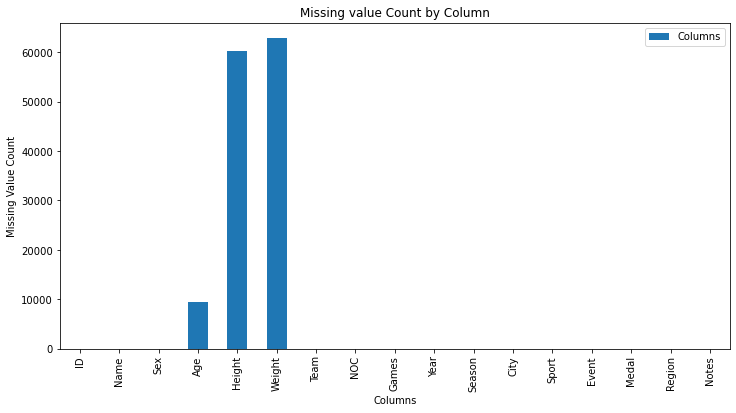

In [11]:
x = data.isna().sum().to_frame()
x.columns = ["Columns"]
x.plot.bar(rot=90, figsize=(12,6))
plt.xlabel("Columns")
plt.ylabel("Missing Value Count")
plt.title('Missing value Count by Column')

# Statistical Analysis

In [19]:
data.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,271116.000000,271116.00000,271116.000000,271116.000000
mean,68248.954396,25.556898,175.33897,70.702393,1978.378480
std,39022.286345,6.280857,9.27810,12.574690,29.877632
min,1.000000,10.000000,127.00000,25.000000,1896.000000
25%,34643.000000,22.000000,170.00000,63.000000,1960.000000
50%,68205.000000,25.000000,175.33897,70.702393,1988.000000
75%,102097.250000,28.000000,180.00000,75.000000,2002.000000
max,135571.000000,97.000000,226.00000,214.000000,2016.000000


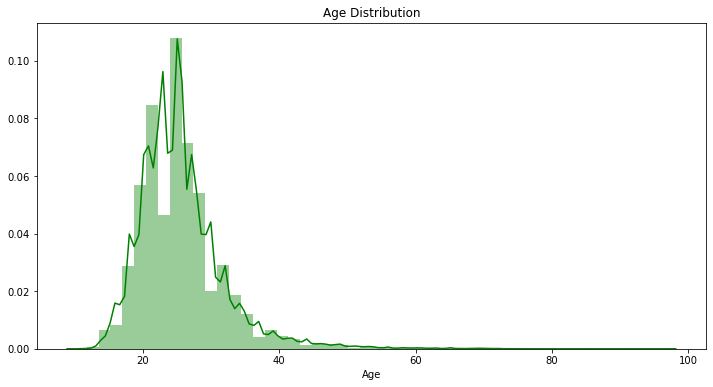

In [20]:
# Age distribution of the participants
plt.figure(figsize=(12,6))
sns.distplot(data.Age,color = 'Green')
plt.xlabel('Age')
plt.title('Age Distribution')
plt.show()

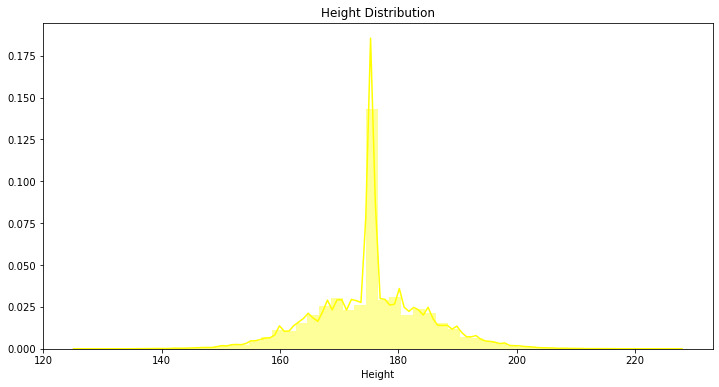

In [21]:
# Height distribution of the participants
plt.figure(figsize=(12,6))
sns.distplot(data.Height,color = 'Yellow')
plt.xlabel('Height')
plt.title('Height Distribution')
plt.show()

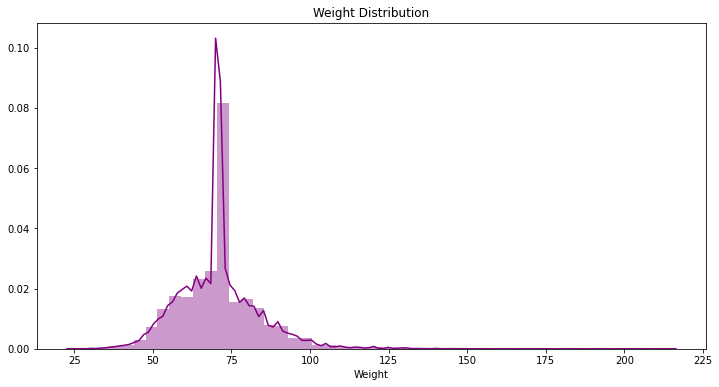

In [22]:
# Weight distribution of the participants
plt.figure(figsize=(12,6))
sns.distplot(data.Weight,color = 'Purple')
plt.xlabel('Weight')
plt.title('Weight Distribution')
plt.show()

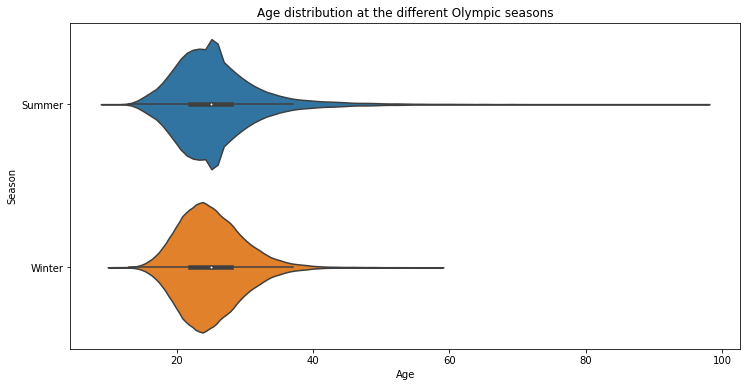

In [23]:
plt.figure(figsize=(12,6))
sns.violinplot(y = data['Season'], x = data['Age'])
plt.title('Age distribution at the different Olympic seasons')
plt.show()

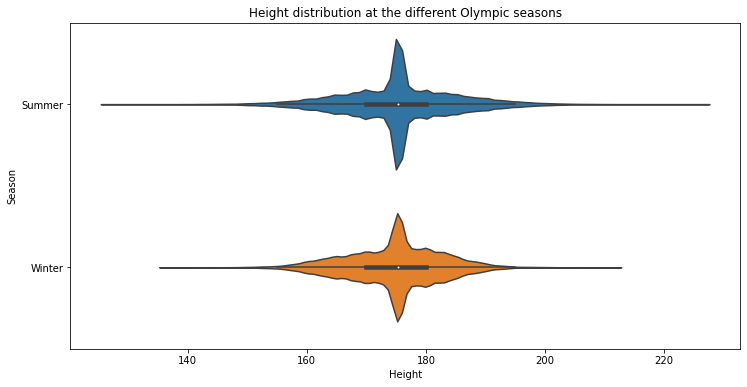

In [24]:
plt.figure(figsize=(12,6))
sns.violinplot(y = data['Season'], x = data['Height'])
plt.title('Height distribution at the different Olympic seasons')
plt.show()

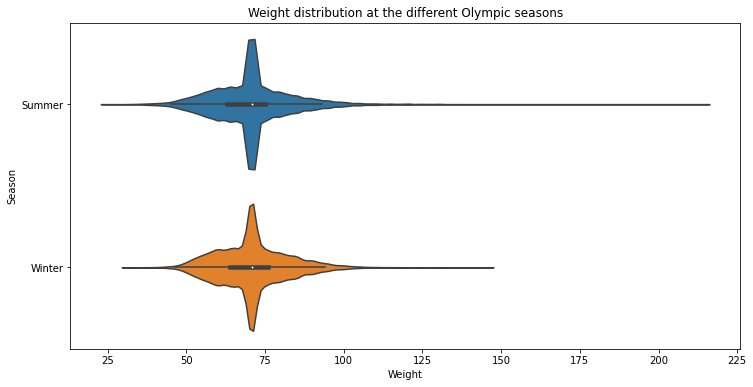

In [25]:
plt.figure(figsize=(12,6))
sns.violinplot(y = data['Season'], x = data['Weight'])
plt.title('Weight distribution at the different Olympic seasons')
plt.show()

# Gender Analysis

In [26]:
# Male and Female Participant
sex_counts = data['Sex'].value_counts()
sex_counts

M    196594
F     74522
Name: Sex, dtype: int64

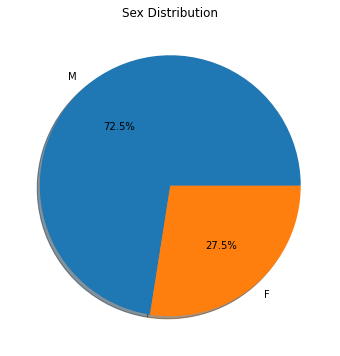

In [27]:
plt.figure(figsize=(12,6))
plt.pie(sex_counts, labels = sex_counts.index,shadow=True,autopct='%1.1f%%')
plt.title('Sex Distribution')
plt.show()

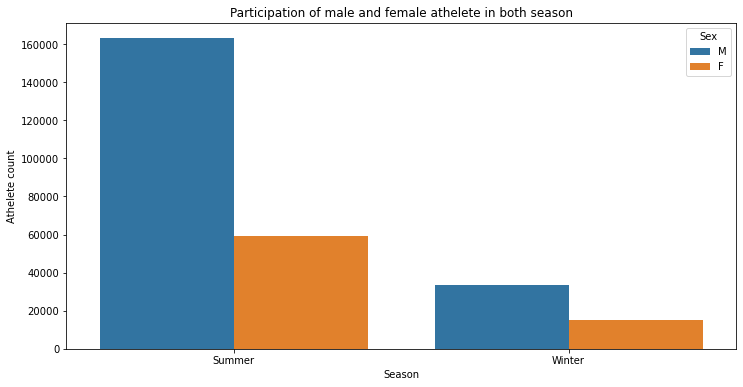

In [28]:
#Distribution according to sex in both season

plt.figure(figsize=(12,6))
sns.countplot(x = "Season", hue = "Sex", data = data)
plt.ylabel("Athelete count")
plt.title('Participation of male and female athelete in both season')
plt.show()

In [29]:
# Winter Olympic Sports
winter_sport = data.query("Season == 'Winter'")['Sport'].unique()
winter_sport

array(['Speed Skating', 'Cross Country Skiing', 'Ice Hockey', 'Biathlon',
       'Alpine Skiing', 'Luge', 'Bobsleigh', 'Figure Skating',
       'Nordic Combined', 'Freestyle Skiing', 'Ski Jumping', 'Curling',
       'Snowboarding', 'Short Track Speed Skating', 'Skeleton',
       'Military Ski Patrol', 'Alpinism'], dtype=object)

Text(0.5, 1.0, 'Count of participant in each winter port')

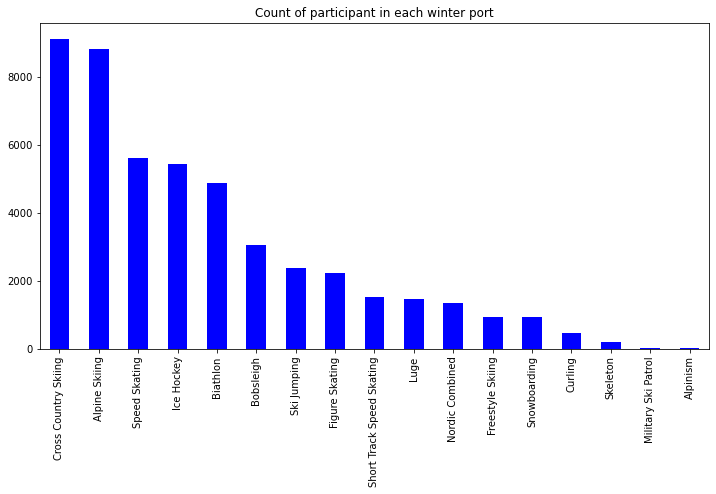

In [30]:
plt.figure(figsize=(12,6))
data.query("Season == 'Winter'")['Sport'].value_counts().plot(kind='bar',color='Blue')
plt.title('Count of participant in each winter port')

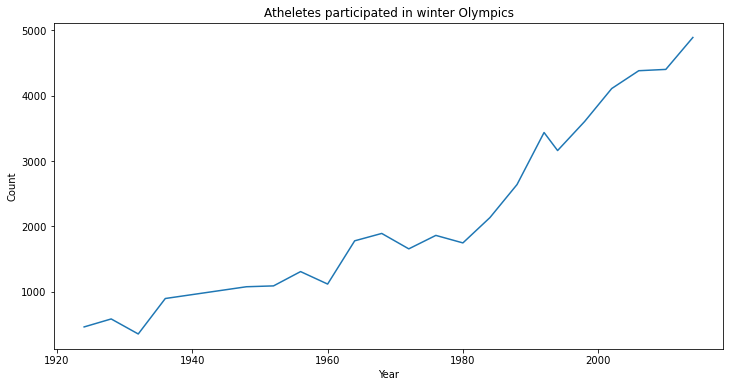

In [15]:
athletes = data[data['Season']=='Winter'].groupby('Year').count().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data = athletes, x = "Year", y = "ID")
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Atheletes participated in winter Olympics')
plt.show()

Text(0.5, 1.0, 'Male And Female participant in each winter sport')

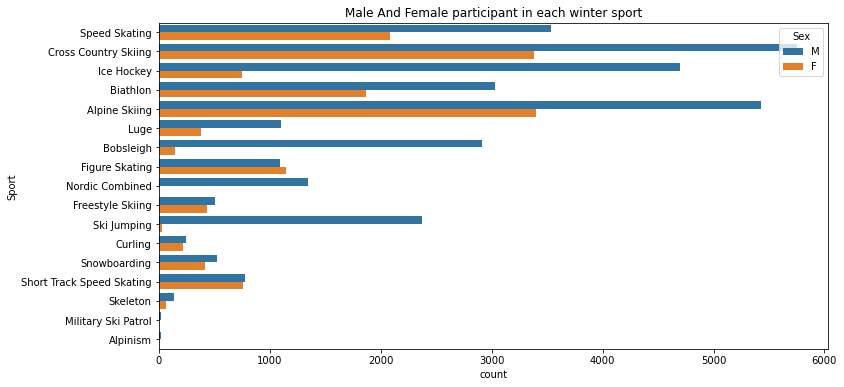

In [32]:
plt.figure(figsize=(12,6))
sns.countplot(data = data, y = data.query("Season == 'Winter'")['Sport'], hue = 'Sex')
plt.title('Male And Female participant in each winter sport')

In [33]:
# Sport Held in Summer Olympic
summer_sport = data.query("Season == 'Summer'")['Sport'].unique()
summer_sport

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

Text(0.5, 1.0, 'Count of participant in each summer sport')

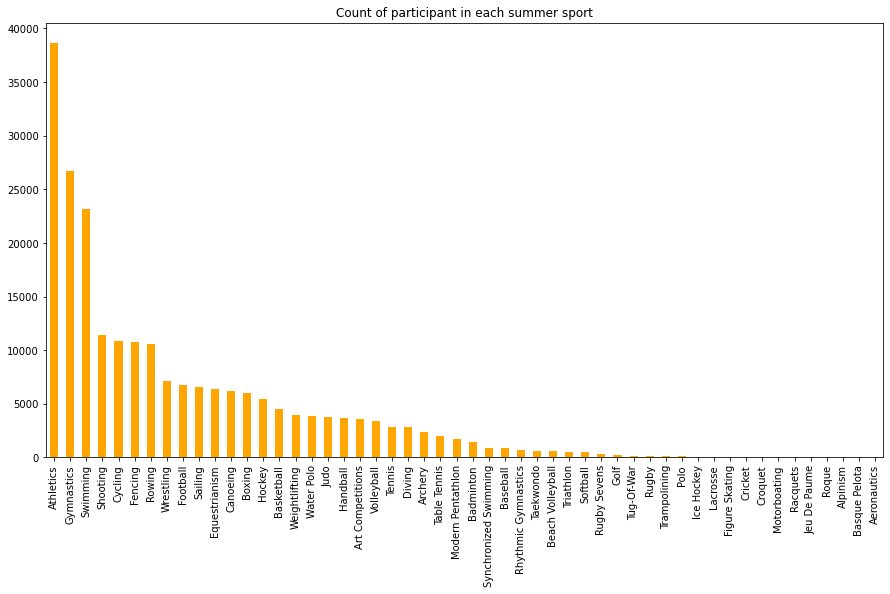

In [10]:
plt.figure(figsize=(15,8))
data.query("Season == 'Summer'")['Sport'].value_counts().plot(kind='bar',color='Orange')
plt.title('Count of participant in each summer sport')

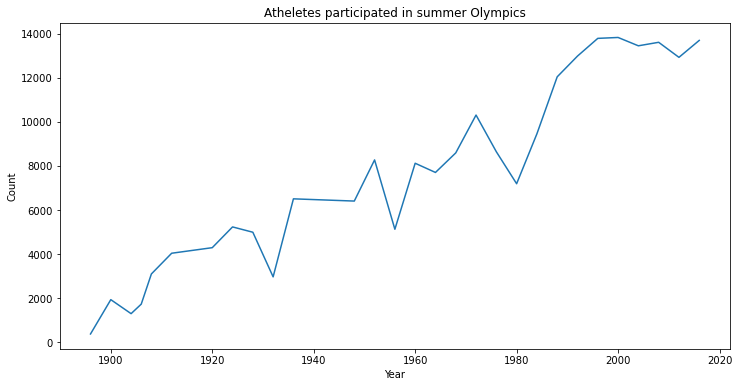

In [9]:
# Atheletes participated in summer Olympics
athletes = data[data['Season']=='Summer'].groupby('Year').count().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data = athletes, x = "Year", y = "ID")
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Atheletes participated in summer Olympics')
plt.show()

Text(0.5, 1.0, 'Male And Female participant in each summer sport')

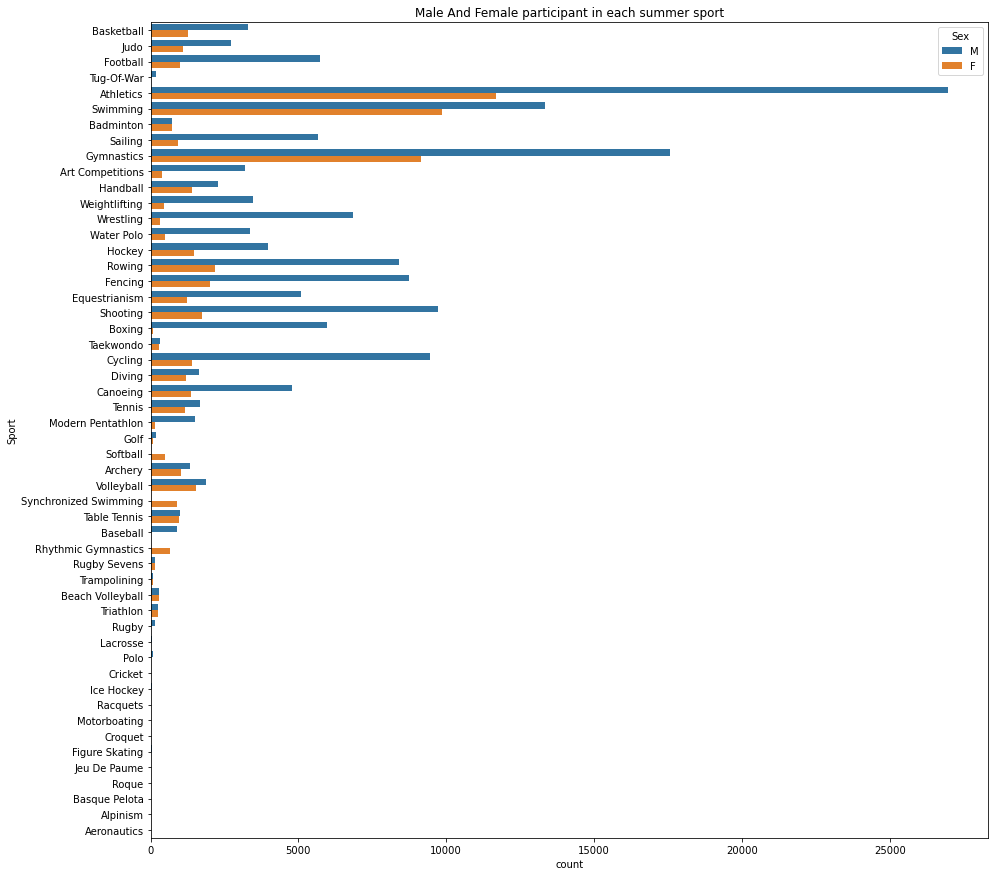

In [11]:
# Male And Female Participant in Each Summer Sport
plt.figure(figsize=(15,15))
sns.countplot(data = data, y = data.query("Season == 'Summer'")['Sport'], hue = 'Sex')
plt.title('Male And Female participant in each summer sport')

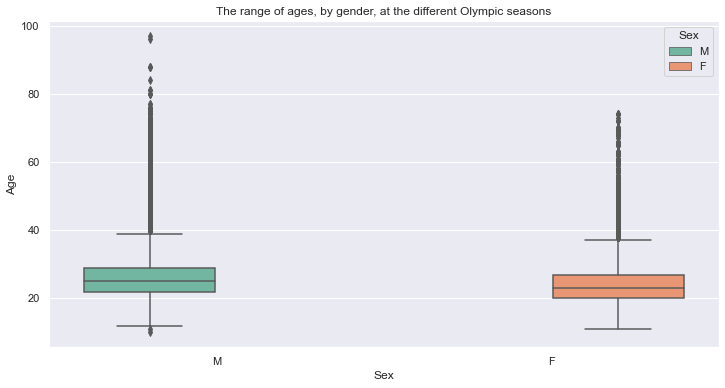

In [37]:
sns.set(style = "darkgrid")
plt.figure(figsize=(12,6))
sns.boxplot(y = "Age", x = "Sex", hue = "Sex", data = data, palette="Set2")
plt.title('The range of ages, by gender, at the different Olympic seasons')
plt.show()

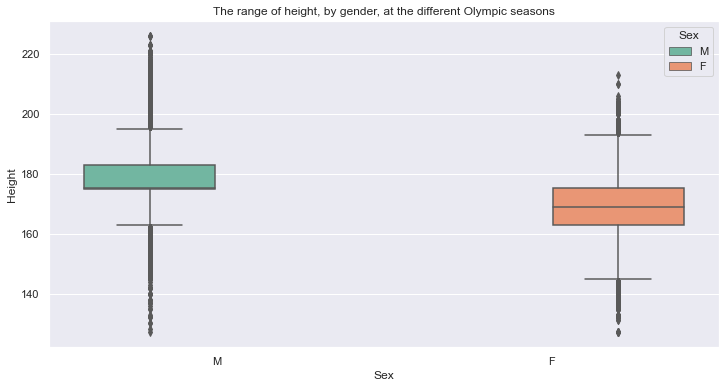

In [38]:
sns.set(style = "darkgrid")
plt.figure(figsize=(12,6))
sns.boxplot(y = "Height", x = "Sex", hue = "Sex", data = data, palette="Set2")
plt.title('The range of height, by gender, at the different Olympic seasons')
plt.show()

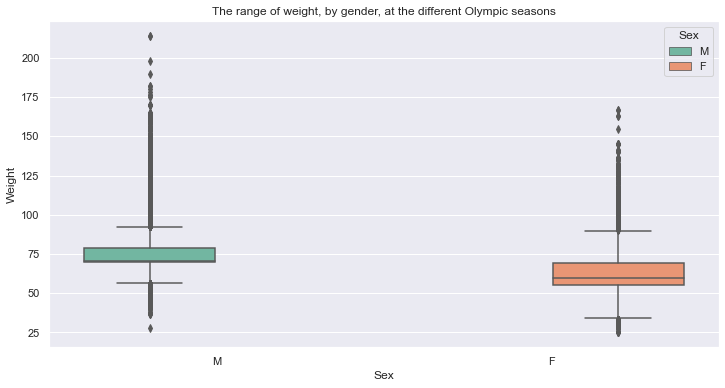

In [39]:
sns.set(style = "darkgrid")
plt.figure(figsize=(12,6))
sns.boxplot(y = "Weight", x = "Sex", hue = "Sex", data = data, palette="Set2")
plt.title('The range of weight, by gender, at the different Olympic seasons')
plt.show()

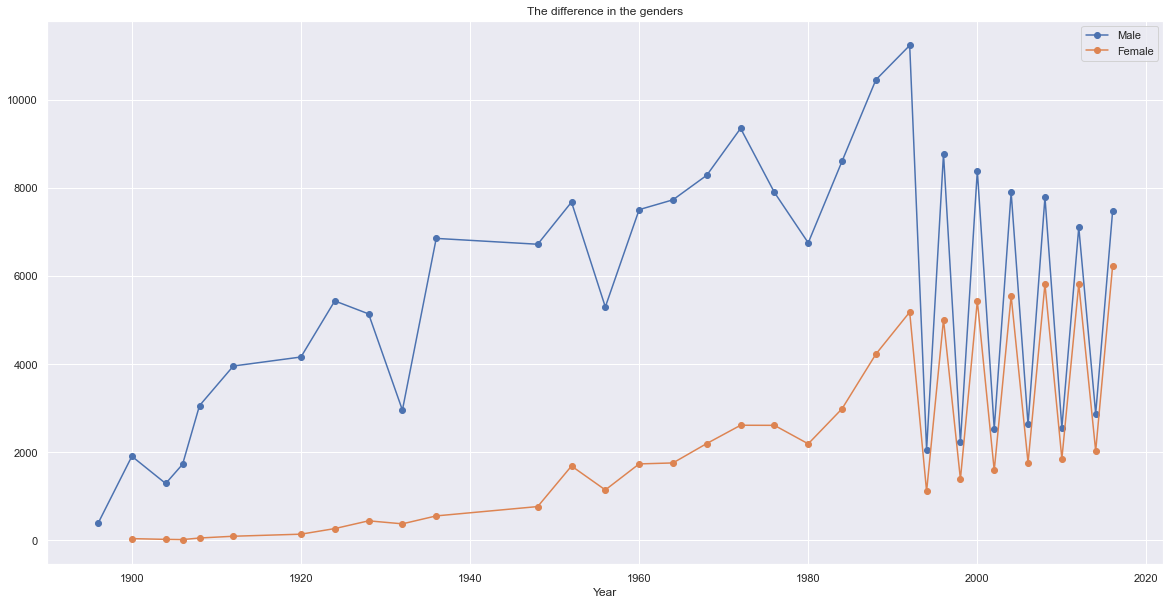

In [40]:
x = data.groupby('Year')['Sex'].value_counts()
plt.subplots(figsize=(20, 10))
x.loc[:,'M'].plot(marker = 'o',label = 'Male')
x.loc[:,'F'].plot(marker = 'o',label = 'Female')
plt.ylabel='Gender Count'
plt.legend()
plt.title('The difference in the genders')
plt.show()

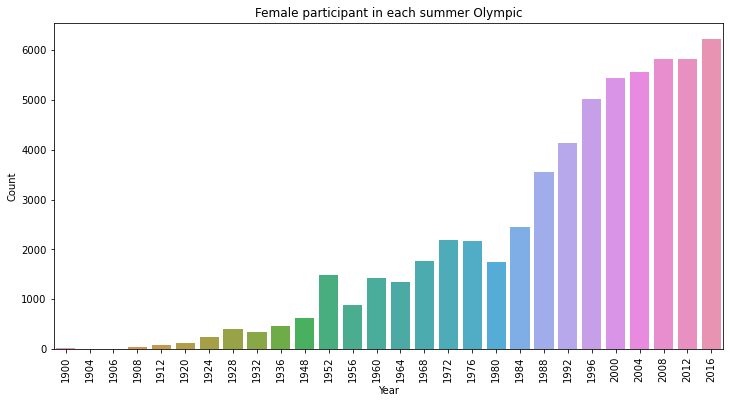

In [17]:
# Total number of Female athletes in each summer Olympics
female_participant_summer = data.query("Sex == 'F' & Season == 'Summer'")[['Sex','Year']]
female_participant_summer = female_participant_summer.groupby('Year').count().reset_index()
plt.figure(figsize=(12,6))
sns.barplot(data=female_participant_summer,x = 'Year', y = 'Sex')
plt.title('Female participant in each summer Olympic')
plt.xticks(rotation = 90)
plt.ylabel('Count')
plt.show()

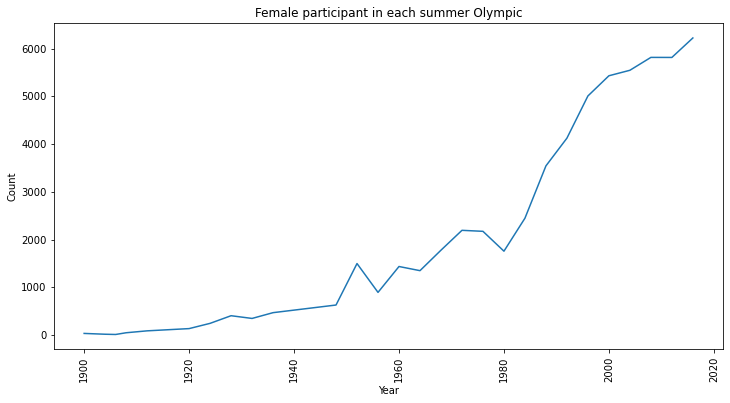

In [18]:
plt.figure(figsize=(12,6))
plt.title('Female participant in each summer Olympic')
plt.xticks(rotation = 90)
sns.lineplot(data = female_participant_summer, x = 'Year', y = 'Sex')
plt.ylabel('Count')
plt.show()

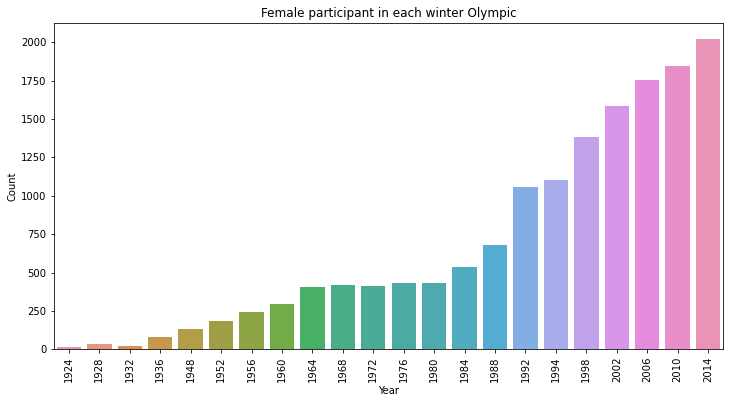

In [19]:
# Total number of Female athletes in each winter Olympics
female_participant_winter = data.query("Sex == 'F' & Season == 'Winter'")[['Sex','Year']]
female_participant_winter = female_participant_winter.groupby('Year').count().reset_index()
plt.figure(figsize=(12,6))
sns.barplot(data = female_participant_winter, x = 'Year', y = 'Sex')
plt.title('Female participant in each winter Olympic')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()

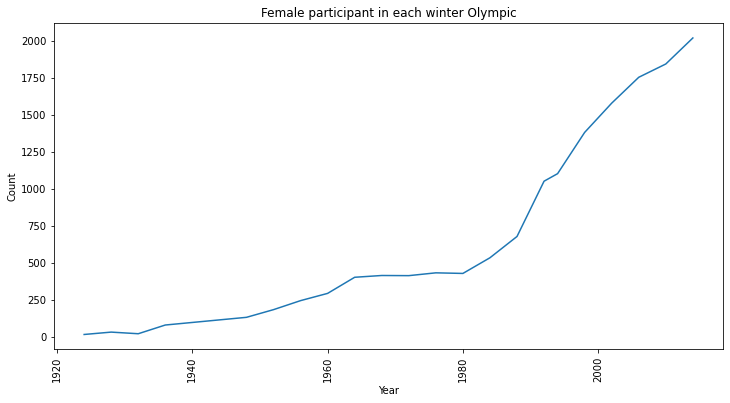

In [20]:
plt.figure(figsize=(12,6))
sns.lineplot(data = female_participant_winter, x = 'Year', y = 'Sex')
plt.title('Female participant in each winter Olympic')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()

# Medal Analysis

In [24]:
# Medal Count
data['Medal'].value_counts()

No medal    231333
Gold         13372
Bronze       13295
Silver       13116
Name: Medal, dtype: int64

In [13]:
goldMedals = data[(data.Medal == 'Gold')]

In [14]:
goldMedals.Region.value_counts().reset_index(name='Medal').head(10)

,index,Medal
0,USA,2638
1,Russia,1599
2,Germany,1301
3,UK,678
4,Italy,575
5,France,501
6,Sweden,479
7,Canada,463
8,Hungary,432
9,Norway,378


Text(0.5, 1.0, 'Medals per Country')

<Figure size 1080x432 with 0 Axes>

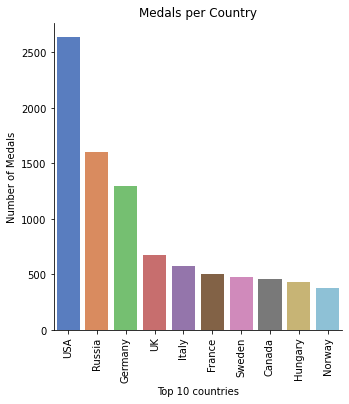

In [14]:
totalGoldMedals = goldMedals.Region.value_counts().reset_index(name='Medal').head(10)
plt.figure(figsize=(15,6))
sns.catplot(x = "index", y = "Medal", data = totalGoldMedals, kind="bar", palette="muted")
plt.xlabel("Top 10 countries")
plt.xticks(rotation = 90)
plt.ylabel("Number of Medals")
plt.title('Medals per Country')

In [15]:
#Looks like most of the medals won by USA. But this is maybe because America sent the largest number of athletes
athletes_count = data['Region'].value_counts().reset_index().rename(columns={'index':'Country','Region':'Athletes Count'}).head(10)
athletes_count.style.set_caption('Total quantity of the athletes who join the olympics since 1896').set_table_styles([
    {'selector': 'caption','props': [('font-weight','bold'),('font-size','15px')]},
    {'selector':'td','props':[('font-size','14px')]},
                                   ])\
.bar(color='#91BB68')\
.applymap(lambda x:'font-weight:bold',subset='Country')

,Country,Athletes Count
0,USA,18853
1,Germany,15883
2,France,12758
3,UK,12256
4,Russia,11692
5,Italy,10715
6,Canada,9734
7,Japan,8444
8,Sweden,8339
9,Australia,7724


In [15]:
athletes_count = data['Region'].value_counts().reset_index().rename(columns={'index':'Country','Region':'Athletes Count'}).head(10)

In [37]:
athletes_count

,Country,Athletes Count
0,USA,18853
1,Germany,15883
2,France,12758
3,UK,12256
4,Russia,11692
5,Italy,10715
6,Canada,9734
7,Japan,8444
8,Sweden,8339
9,Australia,7724


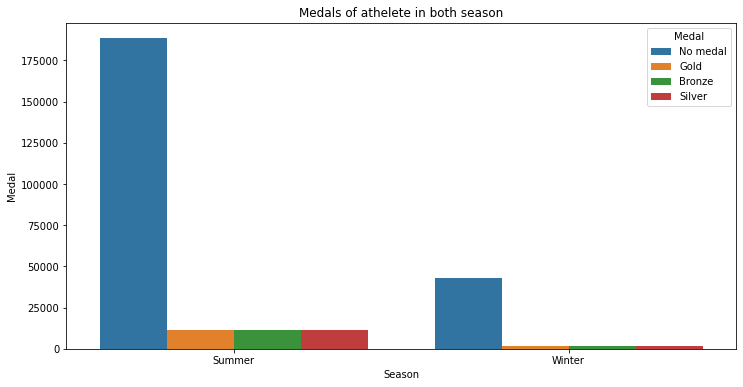

In [26]:
plt.figure(figsize=(12,6))
sns.countplot(x = "Season", hue = "Medal", data = data)
plt.ylabel("Medal")
plt.title('Medals of athelete in both season')
plt.show()

In [111]:
#Top 10 athletes who've won most medals
athlete_count= data.groupby('Name')
athlete_names=athlete_count['Name'].count().sort_values(ascending=False).head(10)

athlete_names

Name
Robert Tait McKenzie                58
Heikki Ilmari Savolainen            39
Joseph "Josy" Stoffel               38
Ioannis Theofilakis                 36
Takashi Ono                         33
Jean Lucien Nicolas Jacoby          32
Alfrd (Arnold-) Hajs (Guttmann-)    32
Alexandros Theofilakis              32
Andreas Wecker                      32
Alfred James Munnings               31
Name: Name, dtype: int64

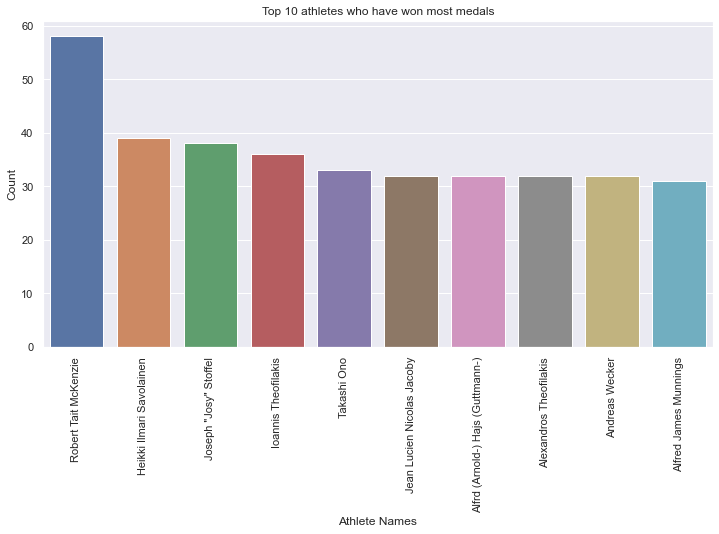

In [114]:
plt.figure(figsize=(12, 6))
sns.barplot(x=athlete_names.index, y=athlete_names.values)
plt.xlabel('Athlete Names')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Top 10 athletes who have won most medals')
plt.show()

In [115]:
#The sport in which athletes have won most medals
common_sport=data['Sport'].value_counts().head(15)

common_sport

Athletics               38624
Gymnastics              26707
Swimming                23195
Shooting                11448
Cycling                 10859
Fencing                 10735
Rowing                  10595
Cross Country Skiing     9133
Alpine Skiing            8829
Wrestling                7154
Football                 6745
Sailing                  6586
Equestrianism            6344
Canoeing                 6171
Boxing                   6047
Name: Sport, dtype: int64

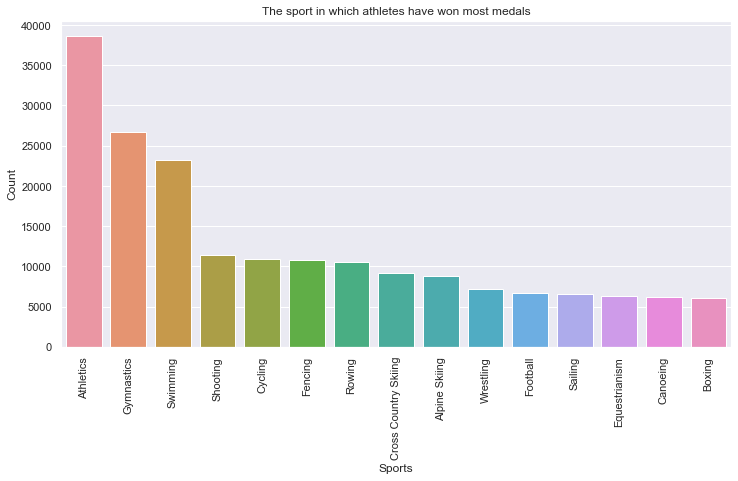

In [117]:
plt.figure(figsize=(12, 6))
sns.barplot(x = common_sport.index, y = common_sport.values)
plt.xlabel('Sports')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('The sport in which athletes have won most medals')
plt.show()

In [118]:
#Which Country has the most medals in Winter Olympics?

winter_medal_country = data[data['Season']=='Winter'].groupby('Team')
winter_medal_country_count= winter_medal_country['Team'].count().sort_values(ascending=False).head(10)

winter_medal_country_count

Team
United States    3321
Canada           2590
Norway           2328
Sweden           2231
Italy            2209
Japan            2056
France           1967
Austria          1954
Germany          1948
Switzerland      1911
Name: Team, dtype: int64

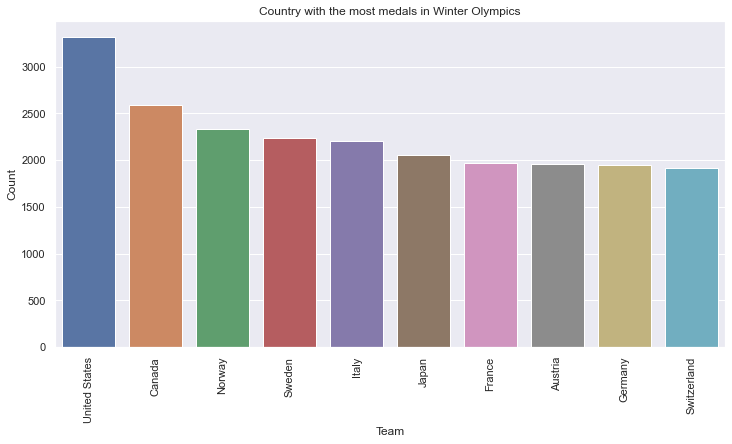

In [121]:
plt.figure(figsize=(12, 6))
sns.barplot(x = winter_medal_country_count.index, y = winter_medal_country_count.values)
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Country with the most medals in Winter Olympics')
plt.show()

In [122]:
#Which Country has the most medals in summer Olympics?

summer_medal_country = data[data['Season']=='Summer'].groupby('Team')
summer_medal_country_count= summer_medal_country['Team'].count().sort_values(ascending=False).head(10)

summer_medal_country_count

Team
United States    14526
Great Britain    10309
France           10021
Italy             8051
Germany           7378
Australia         6976
Canada            6689
Japan             6233
Hungary           6089
Sweden            5821
Name: Team, dtype: int64

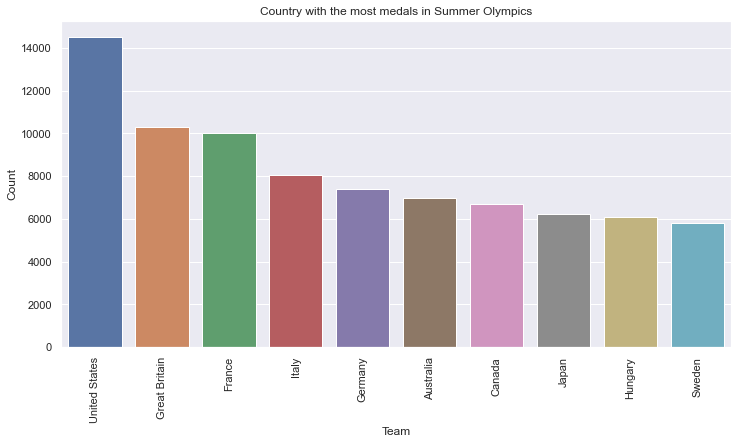

In [124]:
plt.figure(figsize=(12, 6))
sns.barplot(x = summer_medal_country_count.index, y = summer_medal_country_count.values)
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Country with the most medals in Summer Olympics')
plt.show()

# Serbia at Olympic Games

In [54]:
goldMedalsSRB = goldMedals.loc[goldMedals['NOC'] == 'SRB']

In [55]:
goldMedalsSRB.Event.value_counts().reset_index(name='Medal').head(20)

,index,Medal
0,Water Polo Men's Water Polo,13
1,Taekwondo Women's Heavyweight,1
2,"Wrestling Men's Welterweight, Greco-Roman",1


In [60]:
silverMedals = data[(data.Medal == 'Silver')]

In [61]:
silverMedalsSRB = silverMedals.loc[silverMedals['NOC'] == 'SRB']

In [62]:
silverMedalsSRB.Event.value_counts().reset_index(name='Medal').head(20)

,index,Medal
0,Basketball Men's Basketball,12
1,Volleyball Women's Volleyball,12
2,"Canoeing Men's Kayak Doubles, 1,000 metres",2
3,"Shooting Women's Small-Bore Rifle, Three Posit...",1
4,Taekwondo Women's Flyweight,1
5,Swimming Men's 100 metres Butterfly,1


In [63]:
bronzeMedals = data[(data.Medal == 'Bronze')]

In [64]:
bronzeMedalsSRB = bronzeMedals.loc[bronzeMedals['NOC'] == 'SRB']

In [65]:
bronzeMedalsSRB.Event.value_counts().reset_index(name='Medal').head(20)

,index,Medal
0,Water Polo Men's Water Polo,26
1,Basketball Women's Basketball,12
2,"Shooting Men's Air Pistol, 10 metres",1
3,Athletics Women's Long Jump,1
4,Tennis Men's Singles,1


In [66]:
Men = data[(data.Sex == 'M') & (data.Season == 'Summer')]
Women = data[(data.Sex == 'F') & (data.Season == 'Summer')]

In [67]:
SRBMen = Men.loc[Men['Region'] == 'Serbia']
SRBWomen = Women.loc[Women['Region'] == 'Serbia']

In [70]:
SRBMen.head(5)


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
2801,1555,Geard Ajetovi,M,19.0,170.0,67.0,Serbia and Montenegro,SCG,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Welterweight,No medal,Serbia,Serbia and Montenegro
4290,2454,"Josip ""Jozo"" Alebi",M,25.0,177.0,72.0,Yugoslavia,YUG,1972 Summer,1972,Summer,Munich,Athletics,Athletics Men's 400 metres,No medal,Serbia,Yugoslavia
4291,2454,"Josip ""Jozo"" Alebi",M,25.0,177.0,72.0,Yugoslavia,YUG,1972 Summer,1972,Summer,Munich,Athletics,Athletics Men's 4 x 400 metres Relay,No medal,Serbia,Yugoslavia
4292,2454,"Josip ""Jozo"" Alebi",M,29.0,177.0,72.0,Yugoslavia,YUG,1976 Summer,1976,Summer,Montreal,Athletics,Athletics Men's 400 metres,No medal,Serbia,Yugoslavia
4293,2454,"Josip ""Jozo"" Alebi",M,33.0,177.0,72.0,Yugoslavia,YUG,1980 Summer,1980,Summer,Moskva,Athletics,Athletics Men's 400 metres,No medal,Serbia,Yugoslavia


Text(0.5, 1.0, 'Serbian Male Athletes over time')

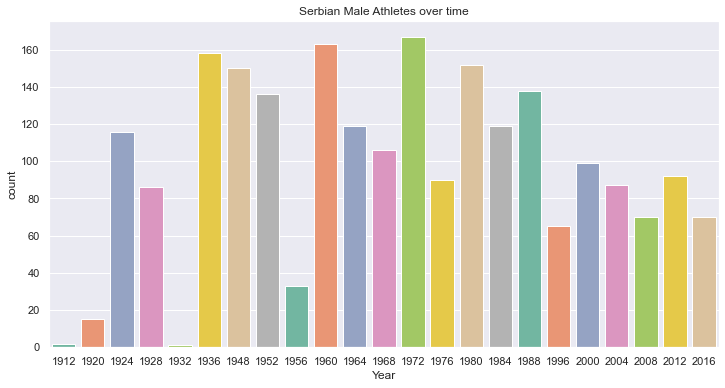

In [73]:
sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))
sns.countplot(x = 'Year', data = SRBMen, palette='Set2')
plt.title('Serbian Male Athletes over time')

Text(0.5, 1.0, 'Serbian Female Athletes over time')

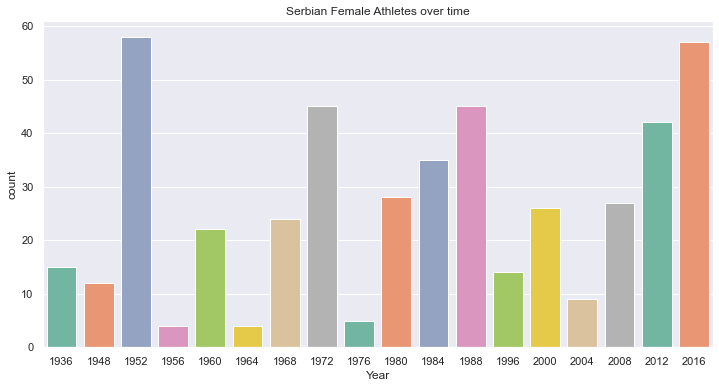

In [91]:
sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))
sns.countplot(x = 'Year', data = SRBWomen, palette='Set2')
plt.title('Serbian Female Athletes over time')

Text(0.5, 1.0, 'Serbian Female Medals over time')

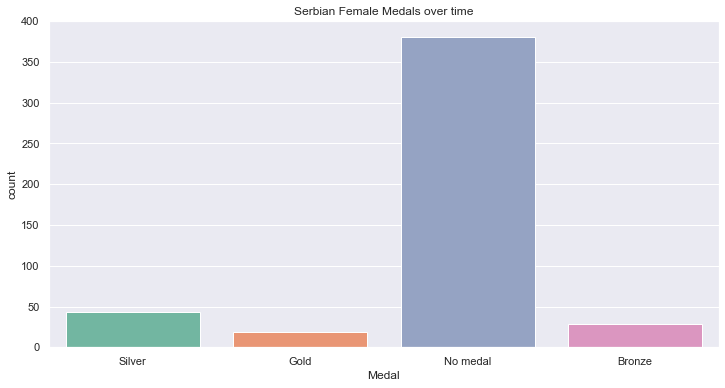

In [100]:
sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))
sns.countplot(x = 'Medal', data = SRBWomen, palette='Set2')
plt.title('Serbian Female Medals over time')

Text(0.5, 1.0, 'Serbian Male Medals over time')

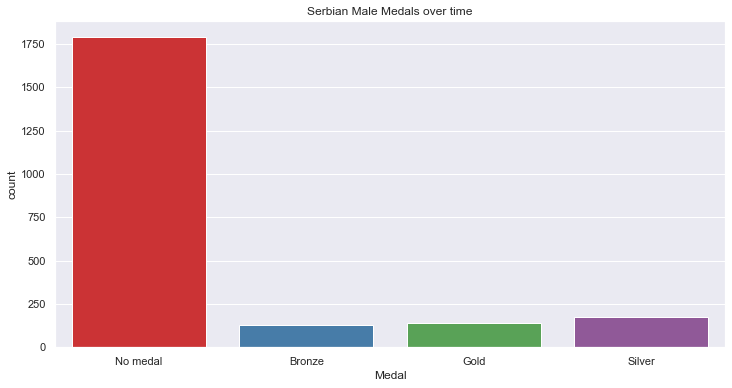

In [105]:
sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))
sns.countplot(x = 'Medal', data = SRBMen, palette='Set1')
plt.title('Serbian Male Medals over time')

In [108]:
SRBMen.describe()

,ID,Age,Height,Weight,Year
count,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000
mean,73704.804834,25.650706,181.295522,78.110972,1969.962399
std,37084.732780,4.742510,10.189483,12.408261,25.934058
min,1555.000000,13.000000,150.000000,45.000000,1912.000000
25%,42940.000000,22.000000,175.338970,70.702393,1952.000000
50%,76610.000000,25.000000,177.000000,73.000000,1972.000000
75%,104037.250000,28.000000,188.000000,85.000000,1988.000000
max,135491.000000,54.000000,217.000000,140.000000,2016.000000


In [109]:
SRBWomen.describe()

,ID,Age,Height,Weight,Year
count,472.000000,472.000000,472.000000,472.000000,472.000000
mean,70692.027542,24.139451,172.894245,64.883426,1983.550847
std,38106.485230,4.646846,9.474130,10.109471,23.497246
min,3652.000000,14.000000,156.000000,46.000000,1936.000000
25%,36719.000000,21.000000,167.000000,57.000000,1968.000000
50%,73985.500000,24.000000,175.000000,66.000000,1984.000000
75%,103113.000000,26.000000,177.000000,70.702393,2008.000000
max,135479.000000,46.000000,201.000000,102.000000,2016.000000


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data = data
data.Name = le.fit_transform(data.Name)
data.Sex = le.fit_transform(data.Sex)
data.Team = le.fit_transform(data.Team)
data.NOC = le.fit_transform(data.NOC)
data.Games = le.fit_transform(data.Games)
data.Season = le.fit_transform(data.Season)
data.City = le.fit_transform(data.City)
data.Sport = le.fit_transform(data.Sport)
data.Event = le.fit_transform(data.Event)
data.Medal = le.fit_transform(data.Medal)
data.Region = le.fit_transform(data.Medal)

data
corr = data.corr()
plt.figure(figsize=(20,9))
PERA = sns.heatmap(corr, annot=True, fmt='.2f')